# Análise Exploratória dos Dados (EDA)

Este notebook tem como objetivo realizar uma análise exploratória dos dados fornecidos para entender melhor o comportamento das variáveis e responder às perguntas de negócio relacionadas à plataforma de aluguéis temporários em Nova York. O conjunto de dados contém informações sobre os anúncios de imóveis para alugar temporariamente na cidade, fornecendo detalhes sobre o preço, a localização, o tipo de imóvel, a disponibilidade e o número de avaliações, entre outras variáveis. Este dataset pode ser utilizado para entender padrões de precificação e outros fatores que influenciam as escolhas de locação.

### Informações do conjunto de dados
1. id – Atua como uma chave exclusiva para cada anúncio nos dados do aplicativo
2. nome - Representa o nome do anúncio
3. host_id - Representa o id do usuário que hospedou o anúncio
4. host_name – Contém o nome do usuário que hospedou o anúncio
5. bairro_group - Contém o nome do bairro onde o anúncio está localizado
6. bairro - Contém o nome da área onde o anúncio está localizado
7. latitude - Contém a latitude do local
8. longitude - Contém a longitude do local
9. room_type – Contém o tipo de espaço de cada anúncio
10. price - Contém o preço por noite em dólares listado pelo anfitrião
11. minimo_noites - Contém o número mínimo de noites que o usuário deve reservar
12. numero_de_reviews - Contém o número de comentários dados a cada listagem
13. ultima_review - Contém a data da última revisão dada à listagem
14. reviews_por_mes - Contém o número de avaliações fornecidas por mês
15. calculado_host_listings_count - Contém a quantidade de listagem por host
16. disponibilidade_365 - Contém o número de dias em que o anúncio está disponível para reserva

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.options.display.float_format = '{:.2f}'.format

# Carregando o dataset
df = pd.read_csv('../data/teste_indicium_precificacao.csv')

## 1. Inspeção do conjunto de dados de forma macro

Vamos iniciar a análise do conjunto de dados verificando as primeiras linhas e informações dos dados para termos uma visão inicial dos dados.

In [4]:
# Verificando as primeiras linhas do Data Frame
df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.69,-73.96,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.80,-73.94,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.75,-73.97,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [5]:
# Verificando as dimensões do arquivo
df.shape

(48894, 16)

In [6]:
# Verificando informações do arquivo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

## 2. Verificando se existem dados ausentes ou inconsistentes

Vamos verificar se o dataset contém valores ausentes (nulos) ou quaisquer inconsistências, como valores que não fazem sentido para as variáveis.

In [7]:
# Contagem de valores ausentes
print(df.isnull().sum())

# Preenchendo valores vazios
dados_transformados = df.copy()  # Fazendo uma cópia para evitar modificar o DataFrame original

dados_transformados["nome"] = dados_transformados["nome"].fillna("Nome Desconhecido")
dados_transformados["host_name"] = dados_transformados["host_name"].fillna("Anfitrião Desconhecido")
dados_transformados["ultima_review"] = pd.to_datetime(dados_transformados["ultima_review"], errors="coerce")
dados_transformados["ultima_review"] = dados_transformados["ultima_review"].fillna(pd.NaT)
dados_transformados["reviews_por_mes"] = dados_transformados["reviews_por_mes"].fillna(0)

# Remover duplicatas
dados_transformados = dados_transformados.drop_duplicates()

# Verificar se ainda existem valores ausentes
print(dados_transformados.isnull().sum())

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64
id                                   0
nome                                 0
host_id                              0
host_name                            0
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price       

In [8]:
# Removendo valores com preços menores ou iguais a zero
dados_transformados = dados_transformados[dados_transformados["price"] > 0]

# Verificando se ainda há preços inválidos
precos_invalidos = dados_transformados[dados_transformados['price'] <= 0].shape[0]
print(f'Número de preços negativos ou zero após a filtragem: {precos_invalidos}')

Número de preços negativos ou zero após a filtragem: 0


In [9]:
# Filtrando latitudes e longitudes válidas
dados_transformados = dados_transformados[
    (dados_transformados['latitude'] >= -90) & (dados_transformados['latitude'] <= 90) &
    (dados_transformados['longitude'] >= -180) & (dados_transformados['longitude'] <= 180)
]

# Verificando latitudes e longitudes inválidas
latitudes_invalidas = dados_transformados[
    (dados_transformados['latitude'] < -90) | (dados_transformados['latitude'] > 90) |
    (dados_transformados['longitude'] < -180) | (dados_transformados['longitude'] > 180)
].shape[0]

print(f'Número de latitudes ou longitudes inválidas: {latitudes_invalidas}')

Número de latitudes ou longitudes inválidas: 0


In [10]:
# Removendo valores inválidos de 'minimo_noites' (menor ou igual a 0)
dados_transformados = dados_transformados[dados_transformados['minimo_noites'] > 0]

# Verificando 'minimo_noites' inválidos (valores negativos ou zero)
minimo_noites_invalidos = dados_transformados[dados_transformados['minimo_noites'] <= 0]

# Exibindo os resultados
print(f'Número de valores inválidos (menor ou igual a 0): {minimo_noites_invalidos.shape[0]}')

Número de valores inválidos (menor ou igual a 0): 0


In [11]:
# Removendo valores inválidos de 'disponibilidade_365' (menor que 0 ou maior que 365)
dados_transformados = dados_transformados[(dados_transformados['disponibilidade_365'] >= 0) & (dados_transformados['disponibilidade_365'] <= 365)]

# Verificando o número de valores inválidos removidos
disponibilidade_invalidos = dados_transformados[(dados_transformados['disponibilidade_365'] < 0) | (dados_transformados['disponibilidade_365'] > 365)]

print(f'Número de valores inválidos (menor que 0 ou maior que 365): {disponibilidade_invalidos.shape[0]}')

Número de valores inválidos (menor que 0 ou maior que 365): 0


## 3. Análise e Transformação de Variáveis Categóricas

In [12]:
# Encontrando o total de valores únicos para cada variável
# Identificando o total de valores únicos para cada variável
valores_unicos = dados_transformados.nunique()

# Exibindo os resultados
valores_unicos

id                               48883
nome                             47894
host_id                          37455
host_name                        11451
bairro_group                         5
bairro                             221
latitude                         19046
longitude                        14715
room_type                            3
price                              673
minimo_noites                      109
numero_de_reviews                  394
ultima_review                     1764
reviews_por_mes                    938
calculado_host_listings_count       47
disponibilidade_365                366
dtype: int64

In [13]:
# Transformando 'room_type' em variável categórica
dados_transformados['room_type'] = dados_transformados['room_type'].astype('category')

In [14]:
# Transformando 'bairro_group' em variável categórica
dados_transformados['bairro_group'] = dados_transformados['bairro_group'].astype('category')

In [15]:
# Transformando 'bairro' em variável categórica
dados_transformados['bairro'] = dados_transformados['bairro'].astype('category')

In [16]:
# Convertendo a coluna 'ultima_review' para o tipo datetime
dados_transformados['ultima_review'] = pd.to_datetime(dados_transformados['ultima_review'], errors='coerce')

In [17]:
# Exibindo o tipo de dados de todas as colunas do DataFrame, para verificar se as convesões ocorreram com sucesso
dados_transformados.dtypes

id                                        int64
nome                                     object
host_id                                   int64
host_name                                object
bairro_group                           category
bairro                                 category
latitude                                float64
longitude                               float64
room_type                              category
price                                     int64
minimo_noites                             int64
numero_de_reviews                         int64
ultima_review                    datetime64[ns]
reviews_por_mes                         float64
calculado_host_listings_count             int64
disponibilidade_365                       int64
dtype: object

## 4. Visualização de Medidas Estatísticas do Conjunto de Dados

Nesta etapa, vamos calcular as principais medidas estatísticas do conjunto de dados para entender a distribuição e as características das variáveis numéricas. 

In [18]:
# Visualizando medidas estatísticas do conjunto de dados
dados_transformados.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,48883.00,48883.00,48883.00,48883.00,48883.00,48883.00,48883.00,38832,48883.00,48883.00,48883.00
mean,19017182.38,67623417.85,40.73,-73.95,152.76,7.03,23.27,2018-10-04 01:14:36.637824256,1.09,7.14,112.77
min,2595.00,2438.00,40.50,-74.24,10.00,1.00,0.00,2011-03-28 00:00:00,0.00,1.00,0.00
25%,9470615.50,7819573.50,40.69,-73.98,69.00,1.00,1.00,2018-07-08 00:00:00,0.04,1.00,0.00
50%,19675743.00,30793816.00,40.72,-73.96,106.00,3.00,5.00,2019-05-19 00:00:00,0.37,1.00,45.00
75%,29153034.50,107434423.00,40.76,-73.94,175.00,5.00,24.00,2019-06-23 00:00:00,1.58,2.00,227.00
max,36487245.00,274321313.00,40.91,-73.71,10000.00,1250.00,629.00,2019-07-08 00:00:00,58.50,327.00,365.00
std,10984090.71,78616871.53,0.05,0.05,240.17,20.51,44.55,NaN,1.60,32.96,131.62


In [19]:
# Visualizando as estatísticas descritivas das variáveis numéricas do conjunto de dados
df_cleaned = dados_transformados.drop(['id', 'host_id','ultima_review','latitude', 'longitude'], axis=1)
df_cleaned.describe()

,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,48883.00,48883.00,48883.00,48883.00,48883.00,48883.00
mean,152.76,7.03,23.27,1.09,7.14,112.77
std,240.17,20.51,44.55,1.60,32.96,131.62
min,10.00,1.00,0.00,0.00,1.00,0.00
25%,69.00,1.00,1.00,0.04,1.00,0.00
50%,106.00,3.00,5.00,0.37,1.00,45.00
75%,175.00,5.00,24.00,1.58,2.00,227.00
max,10000.00,1250.00,629.00,58.50,327.00,365.00


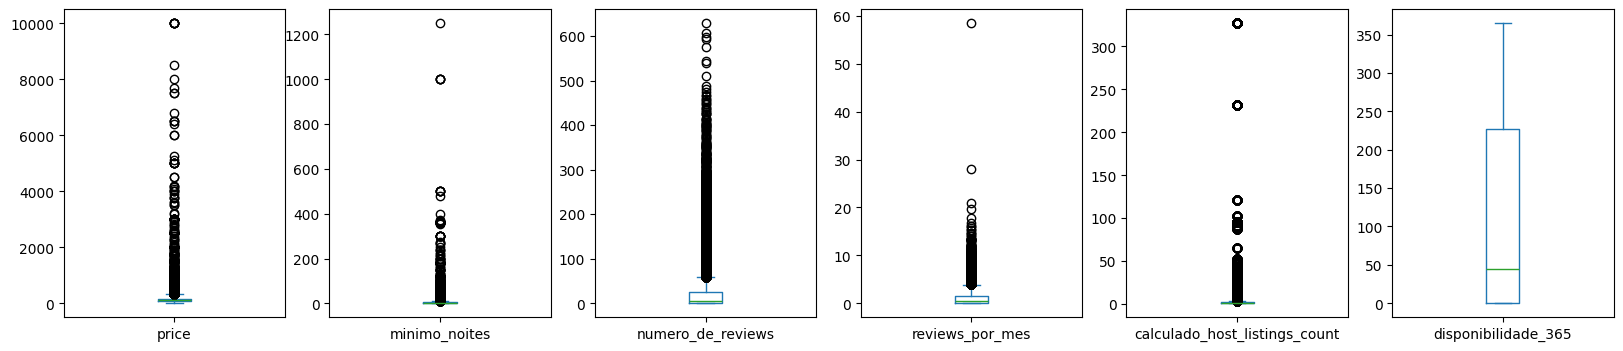

In [20]:
# Gerando um boxplot para visualizar a distribuição das variáveis numéricas em df_cleaned.
df_cleaned.plot(kind='box', figsize=(20, 4), subplots=True);

## 5. Avaliando as variaveis de forma individual

### Tipo de locação (quarto privado, quarto compartilhado e apartamento/casa inteira)

In [21]:
# Descrição estatística dos preços pelo tipo de locação
df_by_room_type = dados_transformados.groupby('room_type', observed=True)['price']
df_by_room_type.describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,25407.00,211.81,284.05,10.00,120.00,160.00,229.00,10000.00
Private room,22318.00,89.81,160.23,10.00,50.00,70.00,95.00,10000.00
Shared room,1158.00,70.25,101.77,10.00,33.00,45.00,75.00,1800.00


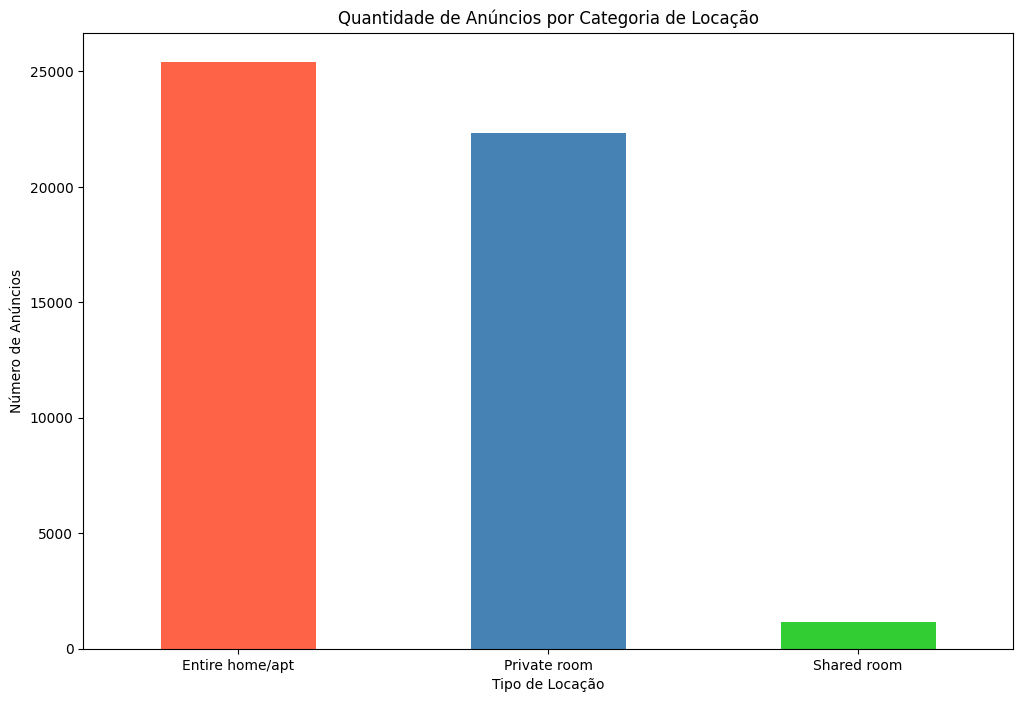

In [22]:
# Gerando gráfico para mostrar a quantidade de anúncios pelo tipo de locação
df_by_room_type.count().plot(kind='bar', figsize=(12,8), color=['#FF6347', '#4682B4', '#32CD32'], layout=(2, 2), legend=False)
plt.xlabel('Tipo de Locação')
plt.ylabel('Número de Anúncios')
plt.xticks(rotation=0) 
plt.title('Quantidade de Anúncios por Categoria de Locação')
plt.show()

O gráfico acima revela que a maior parte dos anúncios está nas categorias apartamento inteiro e quarto privado, indicando que essas são as opções mais procuradas no mercado de locações.

### Grupo de bairros

In [23]:
# Agrupando por 'bairro_group' e mostrando a descrição estatística dos preços
df_by_neighboor_group = dados_transformados.groupby('bairro_group', observed=True)['price']
df_by_neighboor_group.describe()

,count,mean,std,min,25%,50%,75%,max
bairro_group,,,,,,,,
Bronx,1090.00,87.58,106.73,10.00,45.00,65.00,99.00,2500.00
Brooklyn,20094.00,124.44,186.90,10.00,60.00,90.00,150.00,10000.00
Manhattan,21660.00,196.88,291.39,10.00,95.00,150.00,220.00,10000.00
Queens,5666.00,99.52,167.10,10.00,50.00,75.00,110.00,10000.00
Staten Island,373.00,114.81,277.62,13.00,50.00,75.00,110.00,5000.00


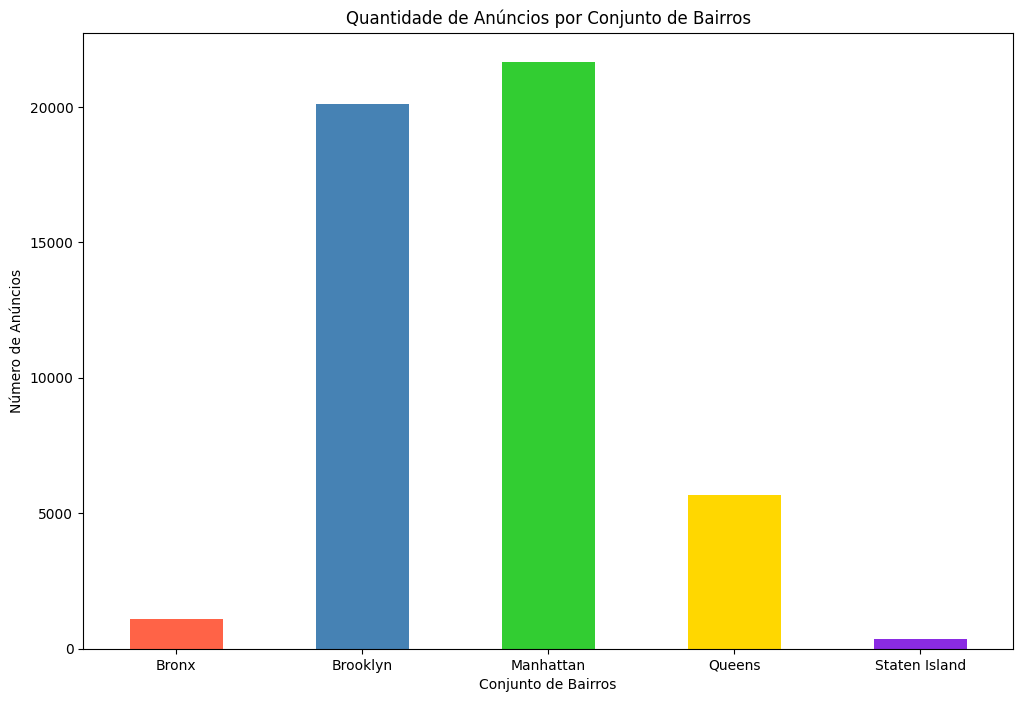

In [24]:
# Gerando gráfico para mostrar a variação do numero de locações por região
df_by_neighboor_group.count().plot(kind='bar', figsize=(12, 8), color=['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#8A2BE2'], legend=False)
plt.xlabel('Conjunto de Bairros')
plt.ylabel('Número de Anúncios')
plt.xticks(rotation=0)
plt.title('Quantidade de Anúncios por Conjunto de Bairros')
plt.show()

O gráfico revela as diferenças de preços de locação entre os bairros de Nova York. Manhattan tem os preços mais altos, com uma média de 196,88 dólares, seguida por Brooklyn, com 124,44 dólares. O Bronx oferece opções mais acessíveis, com uma média de 87,58 dólares, enquanto Queens e Staten Island ficam na faixa intermediária. A grande variação dentro de cada bairro, especialmente em Manhattan e Brooklyn, reflete a ampla gama de opções disponíveis, tanto de luxo quanto mais econômicas.

In [25]:
bins = [0, 100, 200, 500, 1000, 5000, 10000]  
labels = ['0-100', '100-200', '200-500', '500-1000', '1000-5000', '5000+'] 

# Categorizando os preços dos imóveis de acordo com as faixas definidas
dados_transformados['price_range'] = pd.cut(dados_transformados['price'], bins=bins, labels=labels)

# Agrupando por faixas de preço e mostrando informações estatisticas
df_by_price_range = dados_transformados.groupby('price_range', observed=True)['price']
df_by_price_range.describe()

,count,mean,std,min,25%,50%,75%,max
price_range,,,,,,,,
0-100,23917.00,67.89,20.82,10.00,50.00,68.00,85.00,100.00
100-200,16582.00,150.26,29.44,101.00,125.00,150.00,175.00,200.00
200-500,7340.00,296.79,76.55,201.00,240.00,275.00,349.00,500.00
500-1000,805.00,720.80,145.70,503.00,600.00,699.00,800.00,1000.00
1000-5000,219.00,2004.10,954.74,1002.00,1299.50,1700.00,2500.00,5000.00
5000+,20.00,7713.45,1744.86,5100.00,6479.75,7500.00,9999.00,10000.00


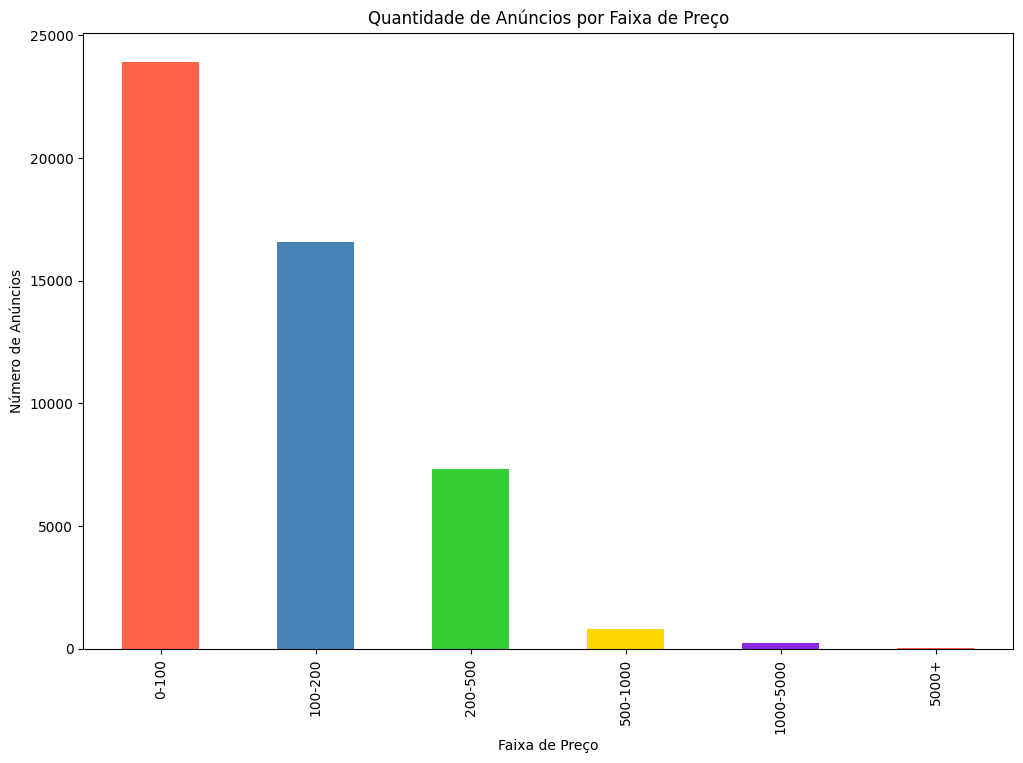

In [26]:
# Gerando gráfico de barras baseado no preco médio
ax = df_by_price_range.count().plot(kind='bar', figsize=(12, 8), color=['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#8A2BE2'])
plt.xlabel('Faixa de Preço')
plt.ylabel('Número de Anúncios')
plt.title('Quantidade de Anúncios por Faixa de Preço')
plt.show()

Ao analisarmos o gráfico acima, fica claro que a grande maioria das locações em Nova York está na faixa de preço entre 50 e 200 dólares por noite. Mais especificamente, a maior concentração está nas faixas de 50-100 e 100-200 dólares, sugerindo que muitas pessoas buscam opções mais acessíveis para se hospedarem. Esses preços mais baixos predominam, o que provavelmente reflete a alta demanda por acomodações que atendam ao orçamento de viajantes que não estão dispostos a gastar muito, mas ainda assim procuram um bom lugar para ficar.

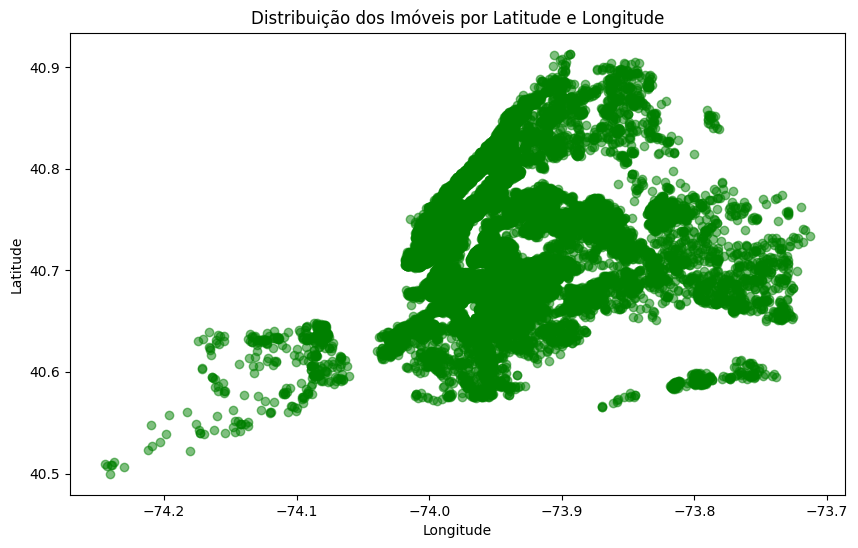

In [27]:
# Criando o gráfico de dispersão entre latitude e longitude
plt.figure(figsize=(10, 6))
plt.scatter(dados_transformados['longitude'], dados_transformados['latitude'], alpha=0.5, color='green')

# Adicionando rótulos e título
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribuição dos Imóveis por Latitude e Longitude')

# Exibindo o gráfico
plt.show()

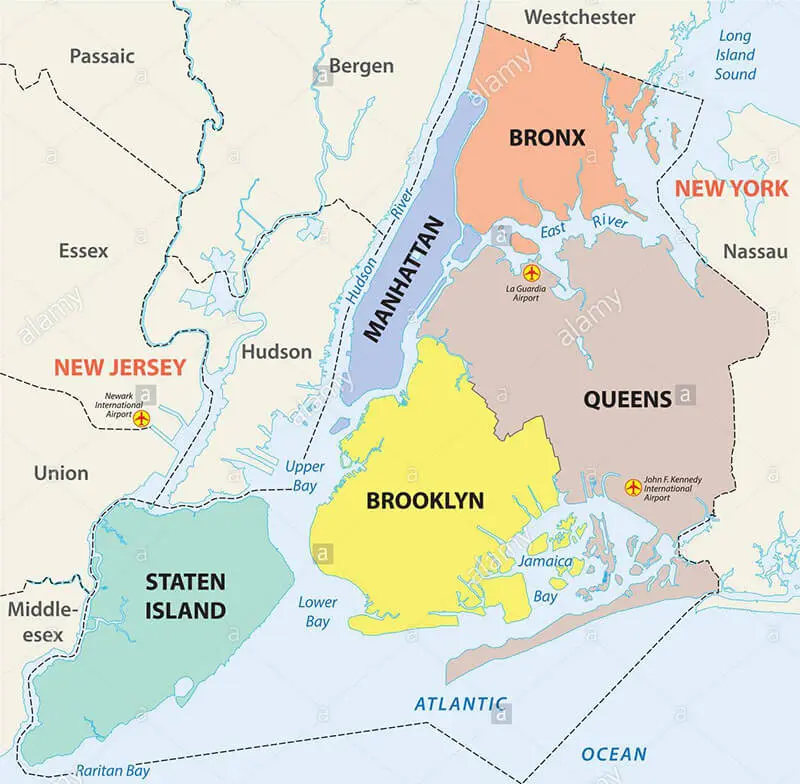

In [28]:
from IPython.display import Image
Image('../utils/images/mapa_nova_york.jpg')

Como podemos observar no gráfico de dispersão, há uma grande concentração de imóveis para locação na região de Manhattan e Brooklyn e áreas adjacentes, incluindo partes do Bronx e Brooklyn, o que reflete a diversidade e a dinâmica do mercado nessas regiões

## 6. Avaliando a relação de cada variável x variável alvo
Nesta etapa, vamos analisar como cada variável do conjunto de dados influencia o preço dos anúncios, utilizando visualizações gráficas para facilitar a comparação e identificar padrões.

In [29]:
# Configurando o plot
plt.rcParams["figure.figsize"] = [8,4]
plt.rcParams["figure.autolayout"] = True

### Análisando relação de Localização x preço

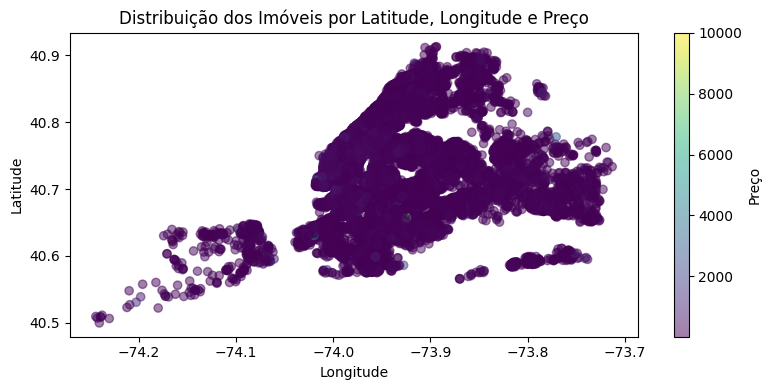

In [30]:
# Gerando um grafico de disperção colorido pelo preço
scatter = plt.scatter(dados_transformados['longitude'], dados_transformados['latitude'], c=dados_transformados['price'], cmap='viridis', alpha=0.5)

# Adicionando rótulos e título
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribuição dos Imóveis por Latitude, Longitude e Preço')

# Adicionando barra de cor para tabelar o preço e mostrando o gráfico
plt.colorbar(scatter, label='Preço')
plt.show()

Como é possível observar, além de Manhattan concentrar a maior quantidade de imóveis anunciados para locação, é também a região com os preços mais elevados. Brooklyn e partes de Queens seguem a mesma tendência, com uma grande oferta de anúncios e valores mais altos em comparação com outras áreas da cidade. Enquanto Staten Island  possui uma quantidade significativamente menor de anúncios e preços mais acessíveis, refletindo uma menor demanda e um perfil de mercado diferente das áreas mais centrais, como Manhattan e Brooklyn.

### Análisando relação de grupo de bairros x preço

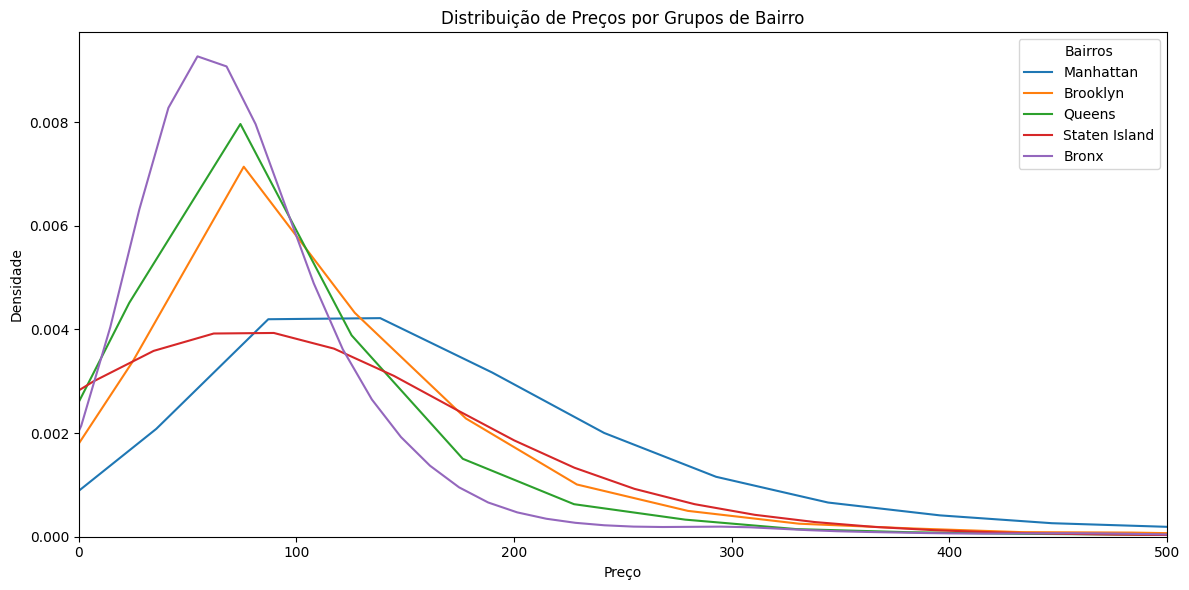

In [31]:
# Obtendo os diferentes grupos de bairros únicos no dataset
bairro_groups = dados_transformados["bairro_group"].unique()

# Gerando gráficos de densidade para cada bairro
plt.figure(figsize=(12, 6))
for bairro in bairro_groups:
    subset = df[df["bairro_group"] == bairro]
    sns.kdeplot(subset["price"], label=bairro)

# Adicionando a legenda e título e mostrando o gráfico
plt.legend(title="Bairros")
plt.xlabel("Preço")
plt.ylabel("Densidade")
plt.title("Distribuição de Preços por Grupos de Bairro")
plt.xlim(0, 500) 
plt.show()

In [32]:
# Definindo faixas de preço para categorizar os valores
bins = [0, 100, 200, 500, 1000, 5000, 10000]  
labels = ['0-100', '100-200', '200-500', '500-1000', '1000-5000', '5000+'] 

# Categorizando os preços dos imóveis de acordo com as faixas definidas
dados_transformados['price_range'] = pd.cut(df['price'], bins=bins, labels=labels) 

# Agrupando os dados por bairro e faixa de preço, contando o número de imóveis em cada faixa
bairro_price_distribution = dados_transformados.groupby(['bairro_group', 'price_range'], observed=False).size().unstack()

# Adicionando a coluna 'Total' para cada bairro
bairro_price_distribution['Total'] = bairro_price_distribution.sum(axis=1)
print(bairro_price_distribution)

price_range    0-100  100-200  200-500  500-1000  1000-5000  5000+  Total
bairro_group                                                             
Bronx            864      181       38         6          1      0   1090
Brooklyn       11762     6277     1826       175         50      4  20094
Manhattan       6920     8803     5164       601        157     15  21660
Queens          4101     1243      293        19          9      1   5666
Staten Island    270       78       19         4          2      0    373


Podemos perceber, olhando no gráfico de densidade e na tabela de preços, que grande parte das casas para locação no Bronx (80%) estão na faixa de preços mais acessível, entre 0 e 100 dólares. Isso mostra que, nesse bairro, a maior parte dos imóveis é bastante acessível. Bairros como Brooklyn, Queens e Staten Island também seguem essa tendência, com mais de 90% dos imóveis abaixo de 200 dólares. Já em Manhattan, a situação é diferente, com apenas 72% dos imóveis dentro dessa faixa, o que evidencia uma maior presença de imóveis de alto custo na região.

### Análisando relação de tipo de locação x preço

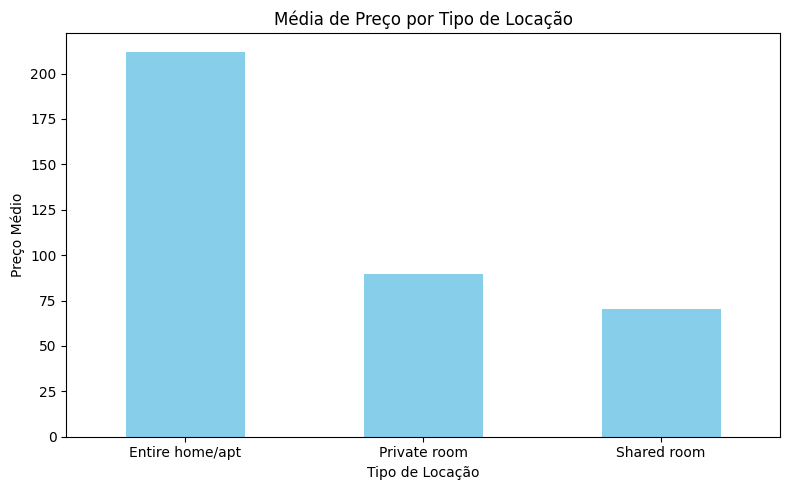

In [33]:
# Calculando a média de preço por tipo de locação
mean_price_by_room_type = dados_transformados.groupby('room_type',observed=True)['price'].mean()

# Plotando a média de preço por tipo de locação
mean_price_by_room_type.plot(kind='bar', figsize=(8, 5), color='skyblue')

# Personalizando o gráfico
plt.title('Média de Preço por Tipo de Locação')
plt.xlabel('Tipo de Locação')
plt.ylabel('Preço Médio')
plt.xticks(rotation=0)
plt.tight_layout()

# Exibindo o gráfico
plt.show()

### Análisando relação de mínimo de noites x preço

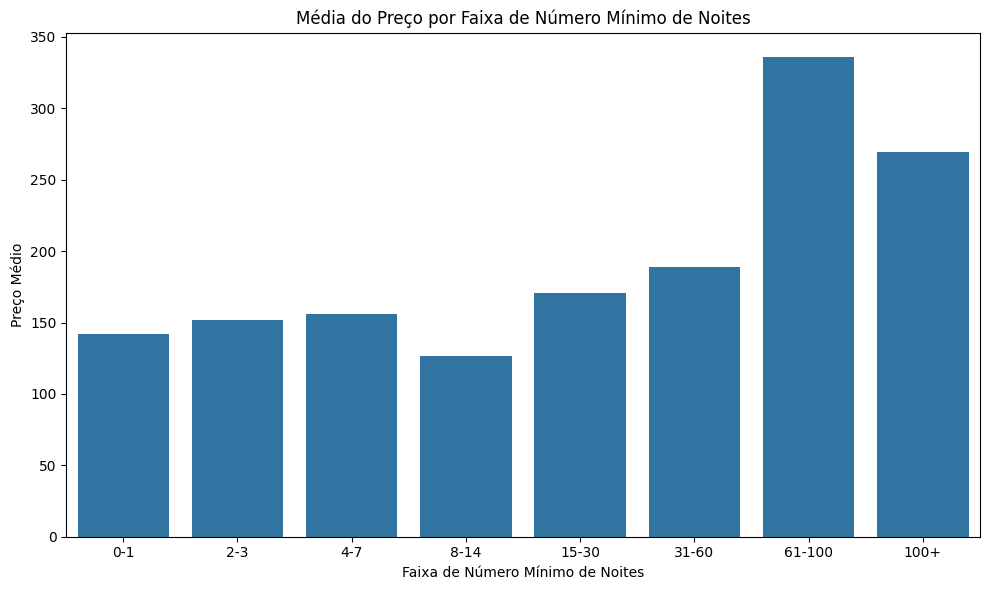

In [34]:
# Definindo faixas para o número mínimo de noites
bins_noites = [0, 1, 3, 7, 14, 30, 60, 100, float('inf')] 
labels_noites = ['0-1', '2-3', '4-7', '8-14', '15-30', '31-60', '61-100', '100+']

# Categorizando o número mínimo de noites de acordo com as faixas definidas
dados_transformados['minimo_noites_range'] = pd.cut(dados_transformados['minimo_noites'], bins=bins_noites, labels=labels_noites, right=True)

# Agrupando por faixa de número mínimo de noites e calculando a média do preço
df_avg_price_by_range = dados_transformados.groupby('minimo_noites_range', observed=True)['price'].mean().reset_index()

# Gráfico de barras para a média do preço por faixa de número mínimo de noites
plt.figure(figsize=(10, 6))
sns.barplot(x='minimo_noites_range', y='price', data=df_avg_price_by_range)
plt.title('Média do Preço por Faixa de Número Mínimo de Noites')
plt.xlabel('Faixa de Número Mínimo de Noites')
plt.ylabel('Preço Médio')
plt.show()

### Análisando relação de número de reviews x preço

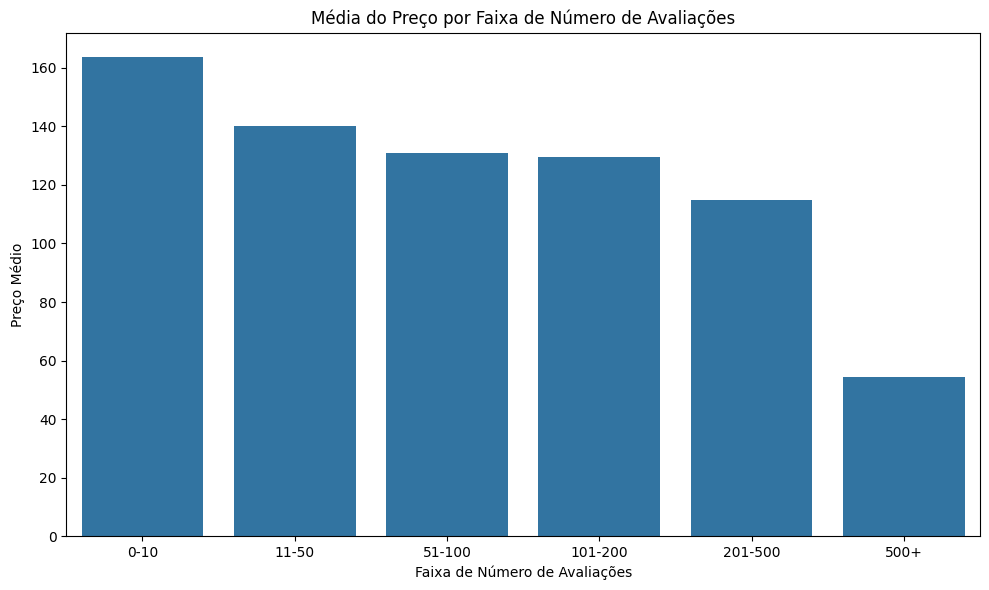

In [35]:
# Definindo as faixas para o número de avaliações
bins_reviews = [0, 10, 50, 100, 200, 500, float('inf')]  # Faixas para o número de avaliações
labels_reviews = ['0-10', '11-50', '51-100', '101-200', '201-500', '500+']

# Categorizando o número de avaliações de acordo com as faixas definidas
dados_transformados['reviews_range'] = pd.cut(dados_transformados['numero_de_reviews'], bins=bins_reviews, labels=labels_reviews, right=False)

# Agrupando por faixa de número de avaliações e calculando a média do preço
df_avg_price_by_reviews = dados_transformados.groupby('reviews_range', observed=True)['price'].mean().reset_index()

# Gráfico de barras para a média do preço por faixa de número de avaliações
plt.figure(figsize=(10, 6))
sns.barplot(x='reviews_range', y='price', data=df_avg_price_by_reviews)
plt.title('Média do Preço por Faixa de Número de Avaliações')
plt.xlabel('Faixa de Número de Avaliações')
plt.ylabel('Preço Médio')
plt.show()

### Análisando relação de última de reviews x preço

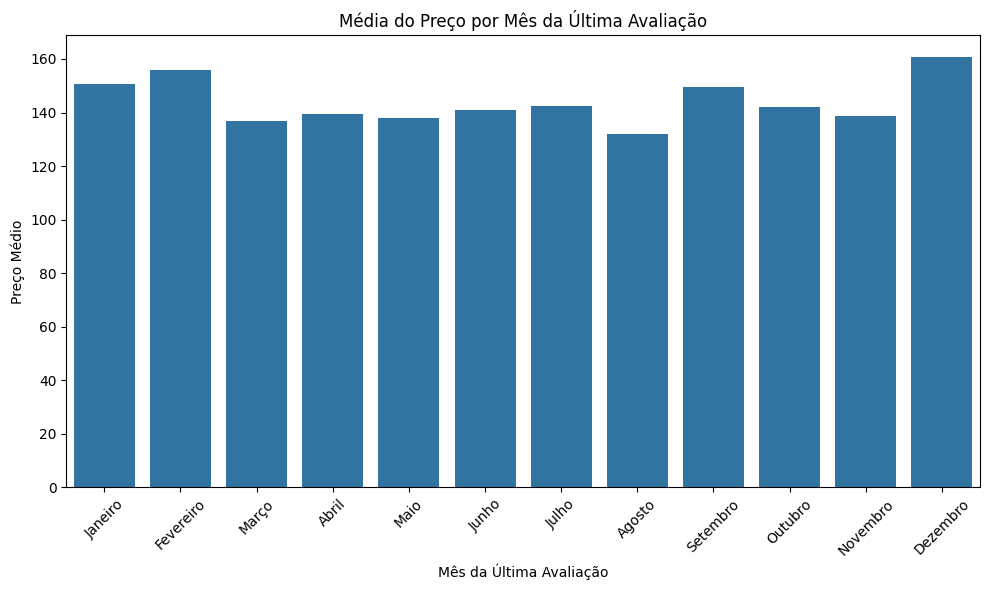

In [36]:
# Dicionário de tradução de meses do inglês para o português
month_translation = {
    'January': 'Janeiro', 'February': 'Fevereiro', 'March': 'Março', 'April': 'Abril',
    'May': 'Maio', 'June': 'Junho', 'July': 'Julho', 'August': 'Agosto',
    'September': 'Setembro', 'October': 'Outubro', 'November': 'Novembro', 'December': 'Dezembro'
}

# Extraindo o mês e traduzindo
dados_transformados['month_last_review'] = dados_transformados['ultima_review'].dt.strftime('%B').map(month_translation)

# Agrupando por mês da última review e calculando a média do preço
df_avg_price_by_month = dados_transformados.groupby('month_last_review')['price'].mean().reset_index()

# Ordenando os meses na ordem do calendário
df_avg_price_by_month['month_last_review'] = pd.Categorical(df_avg_price_by_month['month_last_review'], categories=month_translation.values(), ordered=True)

# Plotando gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='month_last_review', y='price', data=df_avg_price_by_month, order=month_translation.values())
plt.title('Média do Preço por Mês da Última Avaliação')
plt.xlabel('Mês da Última Avaliação')
plt.ylabel('Preço Médio')
plt.xticks(rotation=45)
plt.show()

Observa-se um aumento na média dos preços das locações avaliadas entre dezembro e fevereiro, impulsionado pela alta demanda desse período. Férias, festas de fim de ano e eventos como Réveillon e Carnaval elevam a procura, especialmente por casas inteiras, que oferecem mais espaço e conforto para famílias e grupos.

### Análisando relação de número de avaliações por mes x preço

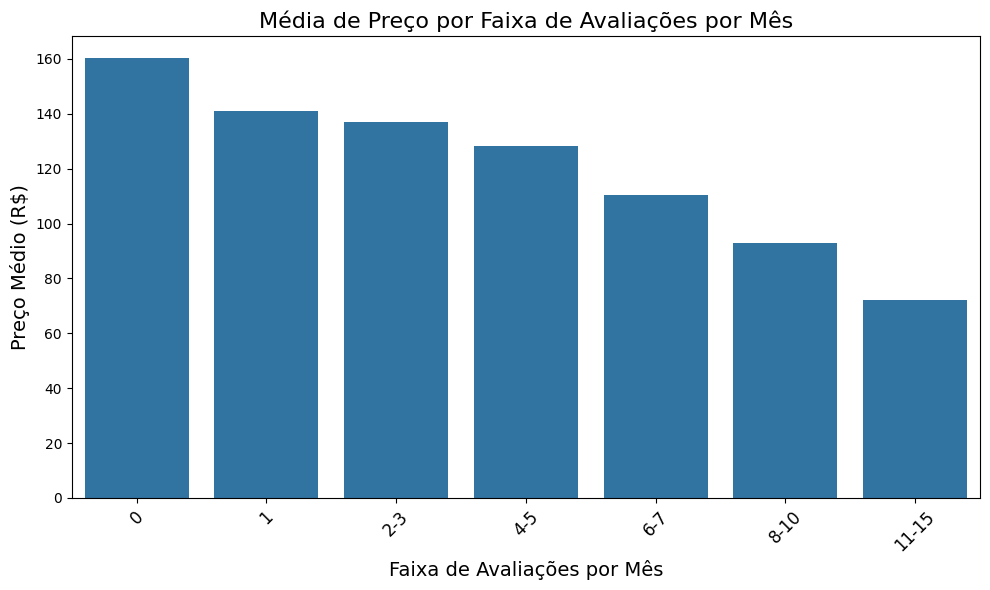

In [37]:
# Definindo as faixas e labels para o número de avaliações por mês
bins_reviews_per_month = [0, 1, 3, 5, 7, 10, 15, float('inf')]
labels_reviews_per_month = ['0', '1', '2-3', '4-5', '6-7', '8-10', '11-15']

# Categorizando e agrupando o número de avaliações por mês e calculando a média do preço
# Adicionando right=False para incluir 0 na faixa 0-1
dados_transformados['reviews_per_month_range'] = pd.cut(dados_transformados['reviews_por_mes'], bins=bins_reviews_per_month, labels=labels_reviews_per_month, right=False)

# Agrupando por faixa de número de avaliações por mês e calculando a média do preço
df_avg_price_by_reviews_per_month = dados_transformados.groupby('reviews_per_month_range', observed=True)['price'].mean().reset_index()

# Gráfico de barras para a média de preço por faixa de número de avaliações por mês
plt.figure(figsize=(10, 6))
sns.barplot(x='reviews_per_month_range', y='price', data=df_avg_price_by_reviews_per_month)
plt.title('Média de Preço por Faixa de Avaliações por Mês', fontsize=16)
plt.xlabel('Faixa de Avaliações por Mês', fontsize=14)
plt.ylabel('Preço Médio (R$)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.show()

Percebe-se que imóveis com menos avaliações mensais geralmente apresentam preços mais altos. Isso acontece porque esses imóveis tendem a ser alugados em períodos de maior demanda e menos vezes, como nas férias ou feriados, quando as pessoas buscam opções mais rapidamente e as alternativas são mais limitadas. Com o tempo e mais avaliações, é provável que o imóvel tenha sido alugado com mais frequência, o que acaba reduzindo o preço médio, tornando-o mais acessível e competitivo.

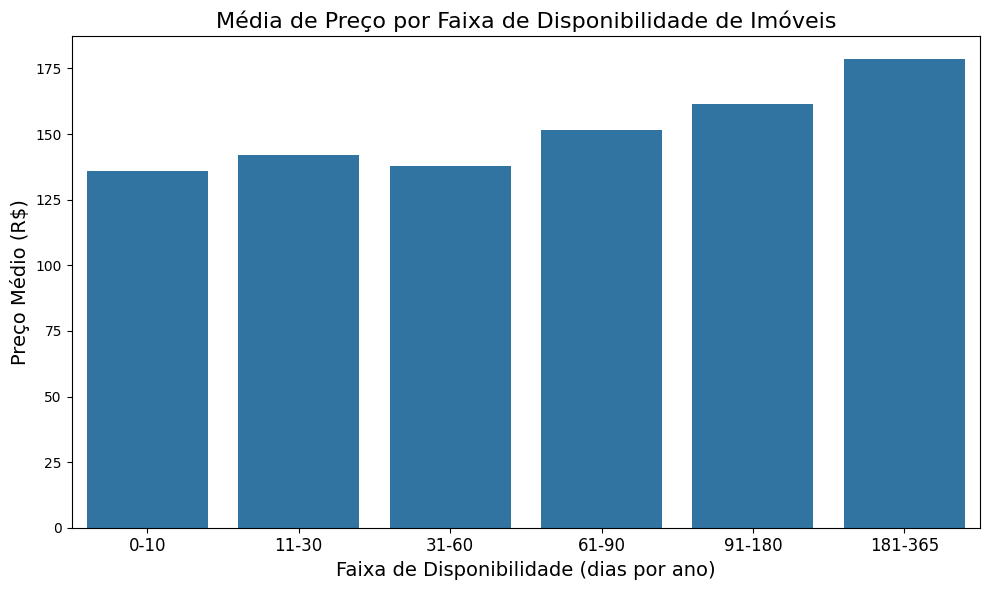

In [38]:
# Definindo as faixas para a disponibilidade de imóveis (dias por ano)
bins_disponibilidade = [0, 10, 30, 60, 90, 180, 365]
labels_disponibilidade = ['0-10', '11-30', '31-60', '61-90', '91-180', '181-365']

# Categorizando a disponibilidade de imóveis de acordo com as faixas definidas
dados_transformados['disponibilidade_range'] = pd.cut(dados_transformados['disponibilidade_365'], 
                                                       bins=bins_disponibilidade, 
                                                       labels=labels_disponibilidade, 
                                                       right=True)

# Verificar se há valores NaN na coluna 'disponibilidade_range' e corrigir
dados_transformados['disponibilidade_range'] = dados_transformados['disponibilidade_range'].fillna('0-10')

# Agrupando por faixa de disponibilidade e calculando a média do preço
df_avg_price_by_disponibilidade = dados_transformados.groupby('disponibilidade_range', observed=True)['price'].mean().reset_index()

# Gráfico de barras para a média de preço por faixa de disponibilidade
plt.figure(figsize=(10, 6))
sns.barplot(x='disponibilidade_range', y='price', data=df_avg_price_by_disponibilidade)
plt.title('Média de Preço por Faixa de Disponibilidade de Imóveis', fontsize=16)
plt.xlabel('Faixa de Disponibilidade (dias por ano)', fontsize=14)
plt.ylabel('Preço Médio (R$)', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.show()

Como podemos observar, há uma tendência de aumento no preço médio à medida que a disponibilidade do imóvel por mais dias ao longo do ano cresce. Imóveis com maior disponibilidade tendem a ter um preço médio mais alto, o que pode indicar que estão localizados em áreas de maior demanda ou oferecem mais opções para os hóspedes, gerando um valor agregado ao imóvel.

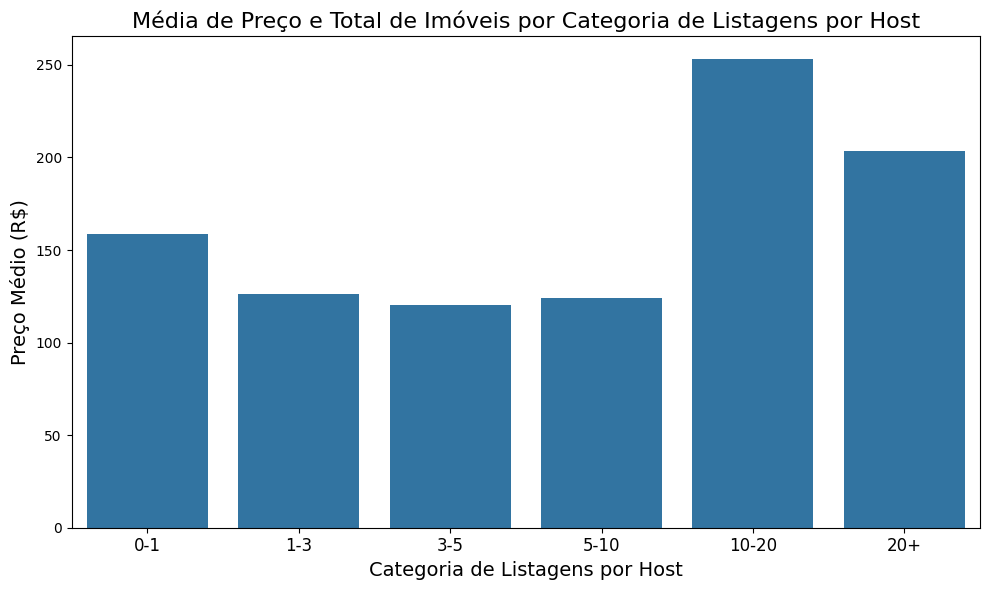

In [39]:
# Definindo as faixas para o número de listagens por host
bins_host_listings = [0, 1, 3, 5, 10, 20, float('inf')]
labels_host_listings = ['0-1', '1-3', '3-5', '5-10', '10-20', '20+']

# Categorizando o número de listagens por host
dados_transformados['host_listings_category'] = pd.cut(dados_transformados['calculado_host_listings_count'], bins=bins_host_listings, labels=labels_host_listings, right=True)

# Agrupando por categoria de listagens por host e calculando a média do preço e a contagem de imóveis
df_avg_price_and_count_by_host_listings_category = dados_transformados.groupby('host_listings_category',observed=True).agg(price_mean=('price', 'mean'))

# Gráfico de barras para a média de preço por categoria de listagens por host
plt.figure(figsize=(10, 6))
sns.barplot(x='host_listings_category', y='price_mean', data=df_avg_price_and_count_by_host_listings_category)
plt.title('Média de Preço e Total de Imóveis por Categoria de Listagens por Host', fontsize=16)
plt.xlabel('Categoria de Listagens por Host', fontsize=14)
plt.ylabel('Preço Médio (R$)', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.show()

Como mostrado no gráfico, imóveis com até 10 listagens por host apresentam preços mais baixos, com a menor média sendo a de 3 a 5 listagens por host. Porém, para imóveis com 10 ou mais listagens, observa-se um aumento significativo no preço médio. Esses imóveis, provavelmente mais exclusivos ou de luxo, justificam o preço mais alto devido a características como conforto, localização e maior capacidade de acomodação.

## 7. Analisando Outliers da váriavel principal (preço)

In [40]:
# Calculando intervalo interquartil (75% - 25%)
intervalo_interquartil = 175 - 69

# Calculando limite inferior
limite_inferior = 69 - 1.5*intervalo_interquartil

# Calculando limite superior
limite_superior = 175 + 1.5*intervalo_interquartil

Para a análise dos preços, consideramos os outliers superiores, uma vez que o limite inferior calculado resultou em um valor negativo, o que não é aplicável no contexto dos preços de locação. Dessa forma, iremos focar apenas nos valores de preço que estão acima do limite inferior, ou seja, aqueles que representam os preços mais elevados em nosso conjunto de dados. 

In [41]:
# Filtrando os outliers superiores
outliers_superiores = dados_transformados[dados_transformados['price'] > limite_superior]

# Ordenando os outliers superiores pelo preço de forma decrescente
outliers_superiores_ordenados = outliers_superiores.sort_values(by='price', ascending=False)

# Exibindo as primeiras 20 linhas dos outliers superiores ordenados
outliers_superiores_ordenados.head(20)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,...,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,price_range,minimo_noites_range,reviews_range,month_last_review,reviews_per_month_range,disponibilidade_range,host_listings_category
17691,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73,-73.96,Entire home/apt,10000,...,0.16,1,0,5000+,4-7,0-10,Julho,0,0-10,0-1
29237,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77,-73.99,Entire home/apt,10000,...,0.00,1,83,5000+,15-30,0-10,NaN,0,61-90,0-1
9150,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.77,-73.92,Private room,10000,...,0.04,1,0,5000+,61-100,0-10,Fevereiro,0,0-10,0-1
40432,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Matt,Manhattan,Lower East Side,40.72,-73.99,Entire home/apt,9999,...,0.00,1,365,5000+,15-30,0-10,NaN,0,181-365,0-1
6529,4737930,Spanish Harlem Apt,1235070,Olson,Manhattan,East Harlem,40.79,-73.94,Entire home/apt,9999,...,0.02,1,0,5000+,4-7,0-10,Janeiro,0,0-10,0-1
12341,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71,-73.99,Private room,9999,...,0.14,1,83,5000+,61-100,0-10,Janeiro,0,61-90,0-1
30267,23377410,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,18128455,Rum,Manhattan,Tribeca,40.72,-74.01,Entire home/apt,8500,...,0.18,1,251,5000+,15-30,0-10,Setembro,0,181-365,0-1
4376,2953058,Film Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69,-73.97,Entire home/apt,8000,...,0.03,11,365,5000+,0-1,0-10,Setembro,0,181-365,10-20
29661,22779726,East 72nd Townhouse by (Hidden by Airbnb),156158778,Sally,Manhattan,Upper East Side,40.77,-73.96,Entire home/apt,7703,...,0.00,12,146,5000+,0-1,0-10,NaN,0,91-180,10-20
42522,33007610,70' Luxury MotorYacht on the Hudson,7407743,Jack,Manhattan,Battery Park City,40.71,-74.02,Entire home/apt,7500,...,0.00,1,364,5000+,0-1,0-10,NaN,0,181-365,0-1


In [42]:
outliers_superiores.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,2972.00,2972.00,2972.00,2972.00,2972.00,2972.00,2972.00,1932,2972.00,2972.00,2972.00
mean,20849946.65,87600586.91,40.74,-73.97,658.78,8.45,12.95,2018-10-29 14:18:38.012422144,0.83,14.94,165.36
min,15396.00,8730.00,40.53,-74.20,335.00,1.00,0.00,2012-09-18 00:00:00,0.00,1.00,0.00
25%,9920032.75,9522475.00,40.72,-73.99,380.00,2.00,0.00,2018-10-02 12:00:00,0.00,1.00,5.00
50%,22217392.50,44193247.00,40.74,-73.98,450.00,3.00,2.00,2019-05-26 00:00:00,0.19,1.00,161.00
75%,32038427.50,163089261.00,40.76,-73.96,650.00,5.00,11.00,2019-06-23 00:00:00,1.07,2.00,311.00
max,36457700.00,274079964.00,40.89,-73.74,10000.00,1000.00,447.00,2019-07-07 00:00:00,14.00,327.00,365.00
std,11777904.70,91097836.28,0.04,0.03,777.56,28.74,28.46,NaN,1.31,54.26,140.79


In [43]:
# Filtrando os outliers superiores para considerar apenas os bairros com 30 ou mais aparições
bairros_com_30_ou_mais_aparicoes = outliers_superiores['bairro'].value_counts()[outliers_superiores['bairro'].value_counts() >= 30].index

# Filtrando os outliers para considerar apenas esses bairros
outliers_filtrados = outliers_superiores[outliers_superiores['bairro'].isin(bairros_com_30_ou_mais_aparicoes)]

# Agrupando pelos bairros e bairro_group, e calculando as estatísticas desejadas
analise_bairros = outliers_filtrados.groupby(['bairro', 'bairro_group'], observed=True).agg(
    preco_medio=('price', 'mean'),
    minimo_noites_medio=('minimo_noites', 'mean'),
    numero_reviews_medio=('numero_de_reviews', 'mean'),
    disponibilidade_media=('disponibilidade_365', 'mean'),
    host_listings=('calculado_host_listings_count', 'mean')
)

# Exibindo os resultados ordenados pelo preço médio, agora com os grupos de bairros incluídos
analise_bairros.sort_values(by='preco_medio', ascending=False)

,,preco_medio,minimo_noites_medio,numero_reviews_medio,disponibilidade_media,host_listings
bairro,bairro_group,,,,,
Clinton Hill,Brooklyn,974.44,3.67,17.00,153.21,2.54
Tribeca,Manhattan,915.80,10.94,13.81,148.51,23.44
Lower East Side,Manhattan,907.90,6.15,14.08,191.87,1.12
Greenwich Village,Manhattan,831.82,8.72,13.90,140.58,1.26
Upper West Side,Manhattan,820.51,9.30,9.84,151.46,10.45
East Harlem,Manhattan,817.70,2.79,14.70,172.42,2.03
Bedford-Stuyvesant,Brooklyn,766.45,4.86,20.78,176.87,1.86
Gramercy,Manhattan,743.18,7.65,16.29,173.00,7.91
Upper East Side,Manhattan,699.28,6.08,10.61,152.53,7.30


Como é possível observar, Manhattan possui a grande concentração de bairros com os preços mais altos, como Tribeca e Lower East Side, que se destacam entre os bairros listados, com preços médios superiores a $900.Esses bairros também tendem a ter um mínimo de noites médio mais alto, indicando que eles estão mais voltados para estadias de longa duração ou para um público com maior poder aquisitivo.

## 1. Hipóteses de Negócio
### 1.1 Localização e Preço
Proposição:
A localização dos imóveis tem um impacto direto no preço de aluguel. Bairros mais centrais ou turísticos, como Tribeca, Lower East Side e Greenwich Village, em Manhattan, tendem a ter preços mais altos devido à alta demanda e à proximidade com pontos de interesse, como atrações turísticas e centros comerciais. Em contrapartida, bairros em Staten Island e Bronx geralmente apresentam preços mais acessíveis, atraindo um público mais local ou turistas em busca de opções mais econômicas.

Conclusão:
A análise dos dados confirma que imóveis em Manhattan, particularmente nas áreas mais centrais, apresentam preços significativamente mais altos em comparação com bairros em outras regiões, como Staten Island e Bronx. A relação entre localização e preço é clara, com Manhattan liderando em preços elevados devido à maior demanda e proximidade com pontos de interesse.

### 1.2 Mínimo de Noites e Preço
Proposição: Espera-se que imóveis com um mínimo de noites mais alto sejam geralmente mais caros, pois indicam uma preferência por estadias mais longas, geralmente associadas a turistas com maior poder aquisitivo.

Conclusão:
A análise dos dados confirma que imóveis com um mínimo de noites mais alto tendem a ser mais caros. Isso está relacionado à preferência por estadias de maior duração, comumente associadas a turistas de maior poder aquisitivo ou àqueles que buscam uma experiência mais longa, como aluguéis para negócios ou residências temporárias.

### 1.3 Número de Avaliações e Preço
Proposição: Imóveis com mais avaliações tendem a ser mais baratos, pois indicam maior popularidade e maior rotatividade, o que é comum em áreas mais acessíveis. A visibilidade do imóvel em plataformas de aluguel atrai mais visitantes e pode reduzir os preços para manter a competitividade.

Conclusão: Imóveis com maior número de avaliações geralmente têm preços mais baixos, a alta rotatividade de turistas nesses locais contribui para a redução dos preços, mantendo a competitividade no mercado.

### 1.4 Tipo de Locação e Preço
Proposição: Espera-se que imóveis classificados como "quarto compartilhado" sejam os mais acessíveis, seguidos por "quarto individual", com "casa inteira" ou "apartamento inteiro" apresentando os preços mais altos. Isso ocorre porque os quartos compartilhados oferecem a menor privacidade e espaço, tornando-se ideais para inquilinos com orçamento mais limitado. Os quartos individuais, embora mais caros, oferecem mais privacidade, enquanto as casas e apartamentos inteiros, por oferecerem total privacidade e mais espaço, tendem a ter os preços mais elevados.

Conclusão: A análise confirma que, de fato, os quartos compartilhados são as opções mais econômicas, seguidos pelos quartos individuais, enquanto as casas e apartamentos inteiros têm os preços mais altos que os demais.

### 1.5 Disponibilidade Anual e Preço
Proposição: Imóveis com maior número de dias disponíveis para reserva tendem a ter preços mais elevados, pois a baixa taxa de ocupação requer ajustes no preço para garantir maior rentabilidade. Imóveis mais baratos, com alta rotatividade, têm menor disponibilidade, já que são frequentemente reservados.

Conclusão: A análise dos dados confirma que imóveis com maior disponibilidade para locação geralmente apresentam preços mais altos, enquanto imóveis mais baratos, com maior rotatividade, tendem a ter uma disponibilidade mais limitada.

### 1.6 Relação entre Preço e listagens por host
Proposição: Donos com mais imóveis para alugar tendem a cobrar preços mais altos, devido à maior experiência e presença na plataforma (muitas vezes por serem empresas), oferecendo um serviço mais profissional e voltado para quem está disposto a pagar um pouco mais por isso. Já os donos com poucos imóveis tendem a praticar preços mais acessíveis, buscando atrair mais clientes e aumentar sua visibilidade.

Conclusão: Donos com mais de 10 imóveis costumam cobrar preços mais elevados, devido à sua maior experiência no mercado e uma base de clientes consolidada. Por outro lado, donos com apenas 1 imóvel tendem a cobrar preços mais altos do que aqueles com até 10 imóveis. Isso ocorre, provavelmente porque eles buscam se destacar e atrair mais visibilidade na plataforma, mas seus preços ainda são consideravelmente mais baixos do que os praticados por donos com mais de 10 imóveis.

### 1.7 Preço em Relação à Latitude e Longitude - Proximidade com Pontos Turísticos
Proposição: Imóveis localizados em regiões com alta concentração de atrações turísticas tendem a ter preços mais elevados devido à maior demanda por acomodações nessas áreas. A proximidade de pontos turísticos pode influenciar diretamente o valor de aluguel.

Conclusão: O gráfico plotado que relaciona o preço com a latitude e longitude, sugere uma possível tendência de que imóveis localizados em áreas próximas a pontos turísticos tendem a apresentar preços mais altos. 

### 1.8 Efeito da Temporada no Preço
Proposição: Imóveis tendem a ter preços mais altos durante a temporada de festas, devido ao aumento na demanda. Durante a baixa temporada, os preços podem ser ajustados para atrair mais clientes.

Conclusão: A análise da média de preços por mês, considerando o mês da última avaliação, mostra que imóveis avaliados em dezembro, janeiro e fevereiro são, em média, mais caros. Esse aumento de preço reflete a alta demanda durante as festas de fim de ano e férias de inverno. Em contrapartida, imóveis avaliados em meses de baixa temporada tendem a ter preços mais baixos, ajustados para se manter competitivos.

### 2. Respostas
a. Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?

Crown Heights, no Brooklyn, oferece preços mais acessíveis, com uma média de 583,98, o que pode ser atraente para investidores com orçamento mais limitado. Além disso, o bairro apresenta um número considerável de 18,36 avaliações mensais, o que indica boa rotatividade e uma demanda razoável, com a vantagem de ter um custo inicial mais baixo. Com uma disponibilidade de 183,04 dias, é uma boa opção para quem deseja um investimento com menor valor, mantendo uma rentabilidade estável.

Por outro lado, Clinton Hill tem um preço médio mais alto, de 974,44, refletindo um padrão superior de imóveis na área. O bairro também apresenta um alto número de 17 avaliações mensais, o que indica boa rotatividade e alta demanda. Se o objetivo do investidor for um imóvel de maior padrão com um fluxo constante de hóspedes, Clinton Hill pode ser uma opção interessante, embora exija um investimento inicial mais elevado.

b. O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

Sim, o número mínimo de noites e a disponibilidade ao longo do ano influenciam diretamente no preço.

Locações com um número mínimo de noites mais alto tendem a ter preços mais elevados, pois geralmente indicam uma demanda mais específica, como turistas de longa estadia ou aqueles que buscam mais conforto e privacidade. Esse tipo de locação atrai um público disposto a pagar mais por uma estadia mais longa.

Imóveis com maior disponibilidade ao longo do ano, ou seja, com mais dias disponíveis para reservas, geralmente têm preços mais elevados. Isso ocorre porque esses imóveis tendem a ter menos ocupação pelo alto valor e, portanto, ficam com maior disponibilidade que opções mais economicas. Por outro lado, imóveis mais populares, que são frequentemente reservados e têm uma maior rotatividade, geralmente têm menor disponibilidade e consequentemente preços mais baixos, pois sua alta demanda leva a uma maior taxa de ocupação.

c. Existe algum padrão no texto do nome do local para lugares de mais alto valor?

Geralmente, imóveis de maior valor seguem padrões específicos em seus nomes, destacando características de luxo e exclusividade. Termos como "Luxury", "Mansion", "Beautiful", "Stunning" são comumente usados para descrever essas propriedades. Por exemplo, nomes como "Luxury 1 Bedroom Apt - Stunning Manhattan Views" ou "Beautiful/Spacious 1 Bed Luxury Flat - TriBeCa/Soho". Além disso, também é comum enfatizarem a sua localização, como "TriBeCa", que é conhecida por seu alto valor imobiliário.

### 3. Explique como você faria a previsão do preço a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

Este é um problema do tipo regressão, pois o objetivo é prever um valor numérico contínuo, no caso, o preço dos imóveis.
Para a resolução foram realizadas transformações para transformar as variáveis categóricas em variáveis numéricas, atraves do pd.get_dummies.

Variáveis Categóricas: bairro, bairro_group, room_type, month_last_review
Variáveis Numéricas: minimo_noites, reviews_por_mes, calculado_host_listings_count, disponibilidade_365, numero_de_reviews

A Regressão Linear foi escolhida por sua simplicidade, interpretabilidade e eficiência em modelar relações lineares entre variáveis, como as vistas nas relações de preço x tipo de imóvel e preço x número de noites.

✅ Prós:
    Fácil de interpretar e implementar.
    Baixo custo computacional.
    Funciona bem quando há uma relação linear entre as variáveis e o preço.
❌ Contras:
    Não captura relações não lineares entre as variáveis.
    Sensível a outliers, que podem distorcer os coeficientes do modelo.
    Supõe que as variáveis sejam independentes, o que pode não ser verdade.

Métricas de Avaliação do Modelo
Foram utilizadas duas métricas para avaliar o desempenho do modelo de regressão:

Erro Quadrático Médio (RMSE):
O RMSE foi escolhido por penalizar mais os erros grandes, o que é importante em problemas de previsão de valores contínuos como o preço de imóveis. Isso permite identificar e mitigar previsões que estão significativamente distantes do valor real.

Erro Absoluto Médio (MAE):
O MAE foi usado para fornecer uma visão geral do erro médio, sem dar tanto peso aos outliers.

In [44]:
# Aleatorizando os dados
dados_transformados = dados_transformados.sample(frac=1, random_state=42).reset_index(drop=True)

# Removendo as colunas 'host_id' e 'id'
dados_transformados = dados_transformados.drop(columns=['host_id', 'id','host_name','ultima_review'])

# Salvando os dados transformados
dados_transformados.to_csv('../data/dados_transformados.csv', index=False)